# Installations

In [1]:
# %pip install "opencv-python-headless<4.3"
# %pip install cellpose
# %pip install cytoself

# %pip install adjustText

# %pip install --upgrade scikit-image

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random
from model import load_data, get_analytics
from cytoself_custom import plot_umap, calc_umap_embvec, plot_feature_spectrum_from_image, arrange_plots
from synthetic_multiplexing import multiplex
from metrics import plot_boostrapping, calc_bootstrapping, plot_metrics, calc_reconstruction_error
from explainability import generate_images, plot_clusters_distance_heatmap
from utils import get_colors_dict
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns

import os
import config
from config import SEED, PRETRAINED_MODEL_PATH, MODEL_FOLDER, METRICS_FOLDER, METRICS_MATCH_PATH, METRICS_RANDOM_PATH, MARKERS
import logging
from figures_V5 import init_logging, get_figures

np.random.seed(SEED)
random.seed(SEED)

%reload_ext autoreload
%autoreload 2
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



In [3]:
log_file_path = f"./logs/figures_V5_pertrubations_new_preprocess.log"
# init_logging(log_file_path)
logging.basicConfig(level=logging.INFO,
                        format="%(asctime)s %(levelname)s %(message)s",
                        datefmt="%Y-%m-%d %H:%M:%S",
                        handlers=[
                            logging.FileHandler(log_file_path),
                            logging.StreamHandler()
                        ])
logging.info('init')

2023-02-26 10:39:40 INFO init


# Pertrubations

## B

2023-02-26 10:39:40 INFO [pertrubations] init
2023-02-26 10:39:40 INFO [pertrubations] Loading data
2023-02-26 10:39:40 INFO [pertrubations] Markers: ['Calreticulin', 'DAPI', 'NCL', 'NONO', 'PURA', 'SQSTM1']
2023-02-26 10:39:40 INFO [pertrubations] Advanced selection: [('WT', 'Untreated'), ('TDP43', 'Untreated')]


Input folder: ./data/processed/spd2/SpinningDisk/Perturbations
Skipping (advanced selection): TDP43/Chloroquine
Skipping (advanced selection): TDP43/DMSO100uM
Skipping (advanced selection): TDP43/DMSO1uM
Skipping (advanced selection): TDP43/Edavarone
Skipping (advanced selection): TDP43/Pridopine
Skipping (advanced selection): TDP43/Riluzole
Skipping (advanced selection): TDP43/Tubastatin
Input subfolder: Calreticulin
Filepath: ./data/processed/spd2/SpinningDisk/Perturbations/TDP43/Untreated/Calreticulin/Untreated_R11_w3confmCherry_s701_Panel_A_TDP43.tif_processed
Filepath: ./data/processed/spd2/SpinningDisk/Perturbations/TDP43/Untreated/Calreticulin/Untreated_R11_w3confmCherry_s702_Panel_A_TDP43.tif_processed
Filepath: ./data/processed/spd2/SpinningDisk/Perturbations/TDP43/Untreated/Calreticulin/Untreated_R11_w3confmCherry_s703_Panel_A_TDP43.tif_processed
Filepath: ./data/processed/spd2/SpinningDisk/Perturbations/TDP43/Untreated/Calreticulin/Untreated_R11_w3confmCherry_s704_Panel_A_TD

2023-02-26 10:45:58 INFO [pertrubations B] Plot UMAPs
2023-02-26 10:45:58 INFO [pertrubations B Calreticulin] Marker: Calreticulin


(7836, 100, 100, 2) (7836, 1)
X, y:
(1050, 100, 100, 2) (1050,)
Calreticulin_TDP43_Untreated    529
Calreticulin_WT_Untreated       521
dtype: int64
Creating the model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2023-02-26 10:45:58 WARNING From /home/labs/eransegal/sagyk/.conda/envs/cytoself/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2023-02-26 10:46:03 WARNING From /home/labs/eransegal/sagyk/.conda/envs/cytoself/lib/python3.7/site-packages/tensorflow_core/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




All files will be saved at model_outputs/


Loading weights


2023-02-26 10:46:07 WARNING OMP_NUM_THREADS is no longer used by the default Keras config. To configure the number of threads, use tf.config.threading APIs.
2023-02-26 10:46:07.814815: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-02-26 10:46:07.844015: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Quadro RTX 6000 major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:88:00.0
2023-02-26 10:46:07.863547: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2023-02-26 10:46:07.995420: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2023-02-26 10:46:08.127470: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2023-02-26 10:46:08.234078: I tensorflow/stream_executor/

./models/MODEL18_model_weights.0040.h5
is loaded.
Ground truth:
['Calreticulin_TDP43_Untreated' 'Calreticulin_WT_Untreated']
Inferring embedding vectors...


2023-02-26 10:46:21.116949: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2023-02-26 10:46:22.164985: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-02-26 10:46:26.469623: W tensorflow/stream_executor/cuda/redzone_allocator.cc:312] Not found: ./bin/ptxas not found
Relying on driver to perform ptx compilation. This message will be only logged once.


1050/1050 [==============================] - 8s 8ms/sample
Computing UMAP...
UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=1, verbose=True)
Construct fuzzy simplicial set


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Sun Feb 26 10:46:31 2023 Finding Nearest Neighbors
Sun Feb 26 10:46:33 2023 Finished Nearest Neighbor Search
Sun Feb 26 10:46:36 2023 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


100%|██████████| 2/2 [00:00<00:00, 34.15it/s]

Sun Feb 26 10:46:39 2023 Finished embedding
Plotting umap_gt subplot1 ...


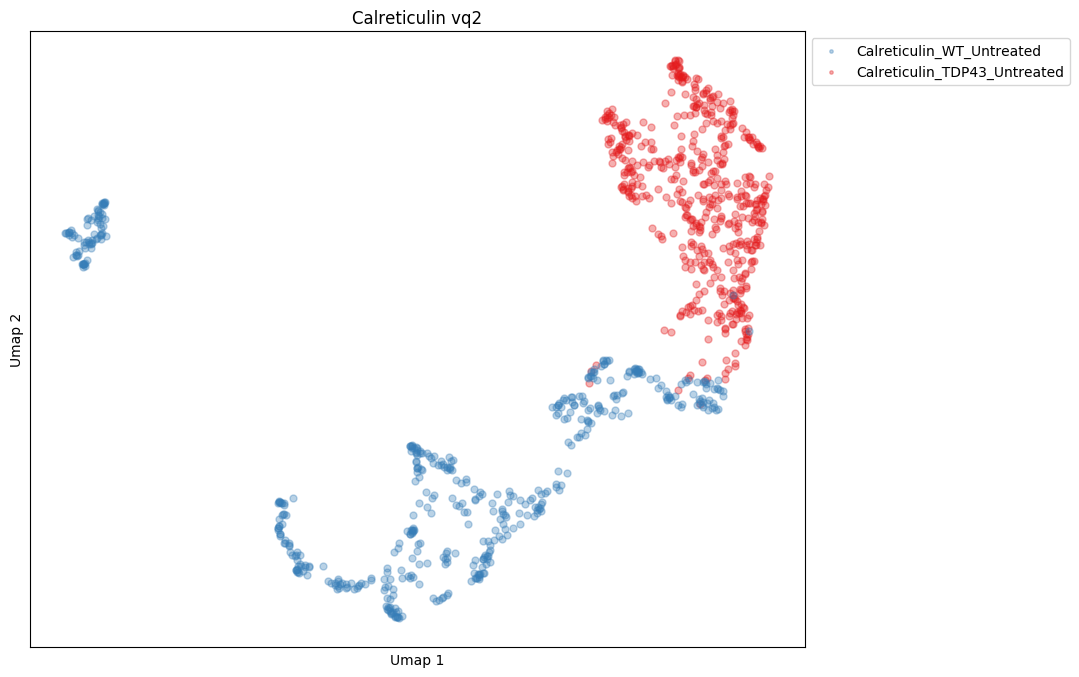

On UMAP vectors


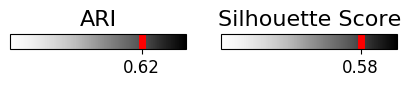

On embedded vectors


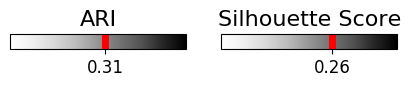

2023-02-26 10:46:41 INFO [pertrubations B DAPI] Marker: DAPI


X, y:
(2262, 100, 100, 2) (2262,)
DAPI_WT_Untreated       1205
DAPI_TDP43_Untreated    1057
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL18_model_weights.0040.h5
is loaded.
Ground truth:
['DAPI_TDP43_Untreated' 'DAPI_WT_Untreated']
Inferring embedding vectors...
2262/2262 [==============================] - 3s 1ms/sample
Computing UMAP...
UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=1, verbose=True)
Construct fuzzy simplicial set
Sun Feb 26 10:47:10 2023 Finding Nearest Neighbors
Sun Feb 26 10:47:10 2023 Finished Nearest Neighbor Search
Sun Feb 26 10:47:10 2023 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


100%|██████████| 2/2 [00:00<00:00, 227.51it/s]

Sun Feb 26 10:47:16 2023 Finished embedding
Plotting umap_gt subplot1 ...


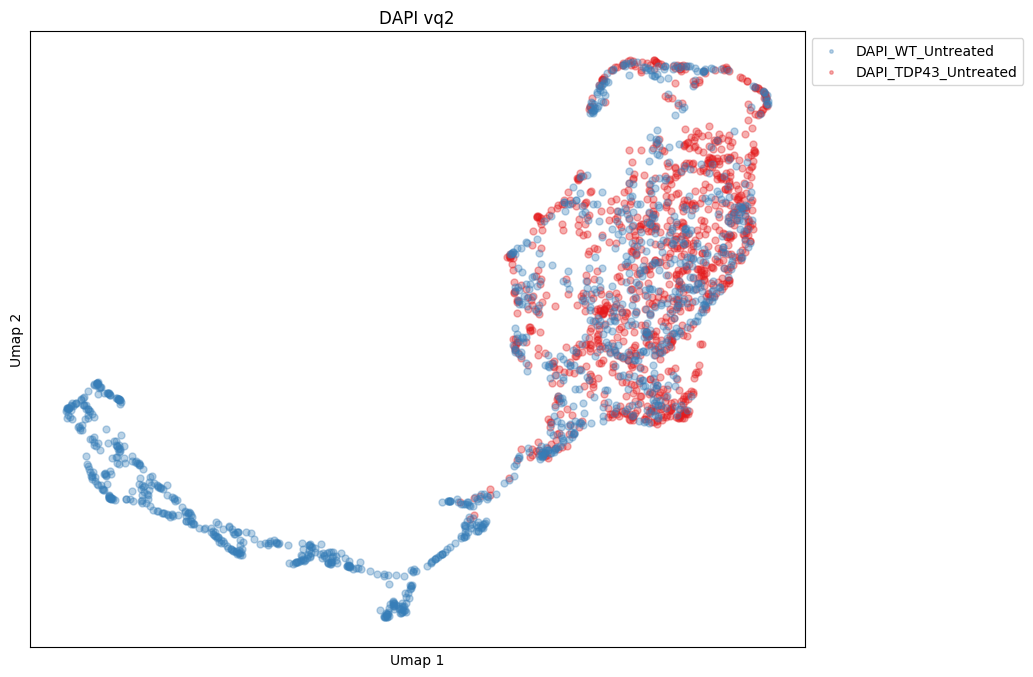

On UMAP vectors


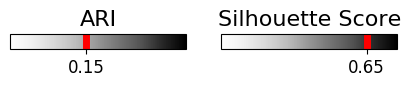

On embedded vectors


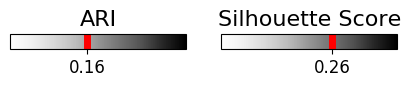

2023-02-26 10:47:18 INFO [pertrubations B NCL] Marker: NCL


X, y:
(1212, 100, 100, 2) (1212,)
NCL_WT_Untreated       684
NCL_TDP43_Untreated    528
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL18_model_weights.0040.h5
is loaded.
Ground truth:
['NCL_TDP43_Untreated' 'NCL_WT_Untreated']
Inferring embedding vectors...
1212/1212 [==============================] - 3s 3ms/sample
Computing UMAP...
UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=1, verbose=True)
Construct fuzzy simplicial set
Sun Feb 26 10:47:38 2023 Finding Nearest Neighbors
Sun Feb 26 10:47:38 2023 Finished Nearest Neighbor Search
Sun Feb 26 10:47:38 2023 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


100%|██████████| 2/2 [00:00<00:00, 307.58it/s]

Sun Feb 26 10:47:42 2023 Finished embedding
Plotting umap_gt subplot1 ...


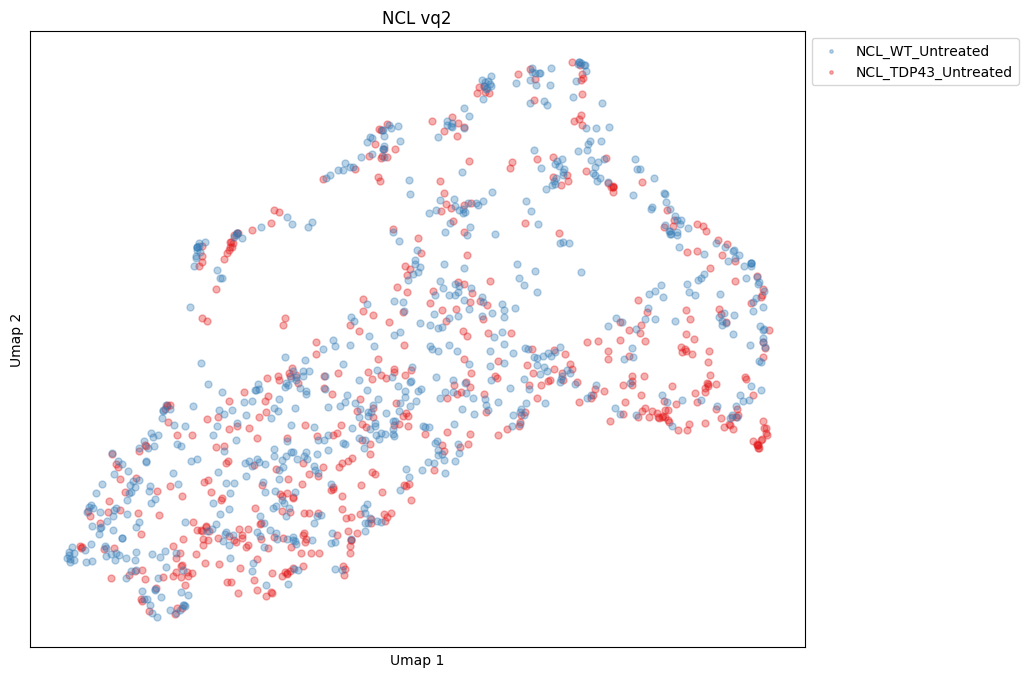

On UMAP vectors


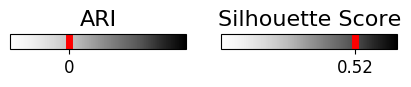

On embedded vectors


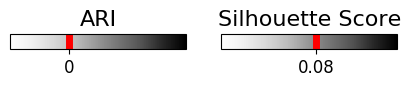

2023-02-26 10:47:44 INFO [pertrubations B NONO] Marker: NONO


X, y:
(1050, 100, 100, 2) (1050,)
NONO_TDP43_Untreated    529
NONO_WT_Untreated       521
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL18_model_weights.0040.h5
is loaded.
Ground truth:
['NONO_TDP43_Untreated' 'NONO_WT_Untreated']
Inferring embedding vectors...
1050/1050 [==============================] - 3s 3ms/sample
Computing UMAP...
UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=1, verbose=True)
Construct fuzzy simplicial set
Sun Feb 26 10:48:05 2023 Finding Nearest Neighbors
Sun Feb 26 10:48:05 2023 Finished Nearest Neighbor Search
Sun Feb 26 10:48:05 2023 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


100%|██████████| 2/2 [00:00<00:00, 300.02it/s]

Sun Feb 26 10:48:07 2023 Finished embedding
Plotting umap_gt subplot1 ...


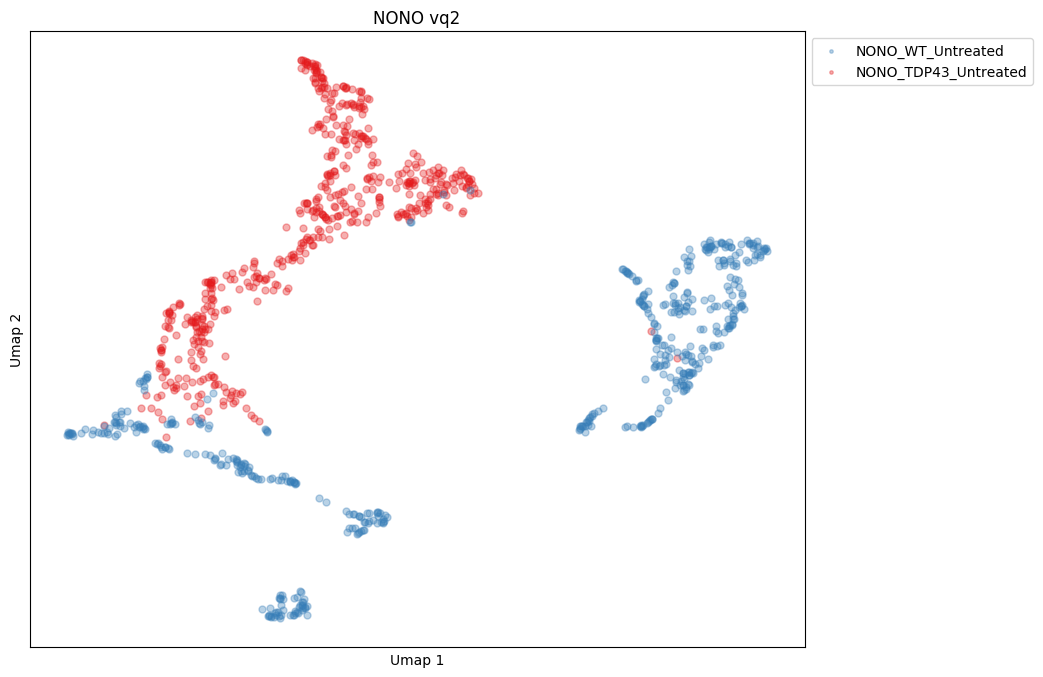

On UMAP vectors


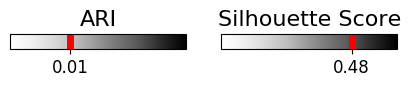

On embedded vectors


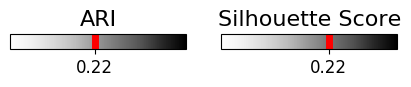

2023-02-26 10:48:09 INFO [pertrubations B PURA] Marker: PURA


X, y:
(1050, 100, 100, 2) (1050,)
PURA_TDP43_Untreated    529
PURA_WT_Untreated       521
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL18_model_weights.0040.h5
is loaded.
Ground truth:
['PURA_TDP43_Untreated' 'PURA_WT_Untreated']
Inferring embedding vectors...
1050/1050 [==============================] - 4s 4ms/sample
Computing UMAP...
UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=1, verbose=True)
Construct fuzzy simplicial set
Sun Feb 26 10:48:32 2023 Finding Nearest Neighbors
Sun Feb 26 10:48:32 2023 Finished Nearest Neighbor Search
Sun Feb 26 10:48:32 2023 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


100%|██████████| 2/2 [00:00<00:00, 287.56it/s]

Sun Feb 26 10:48:35 2023 Finished embedding
Plotting umap_gt subplot1 ...


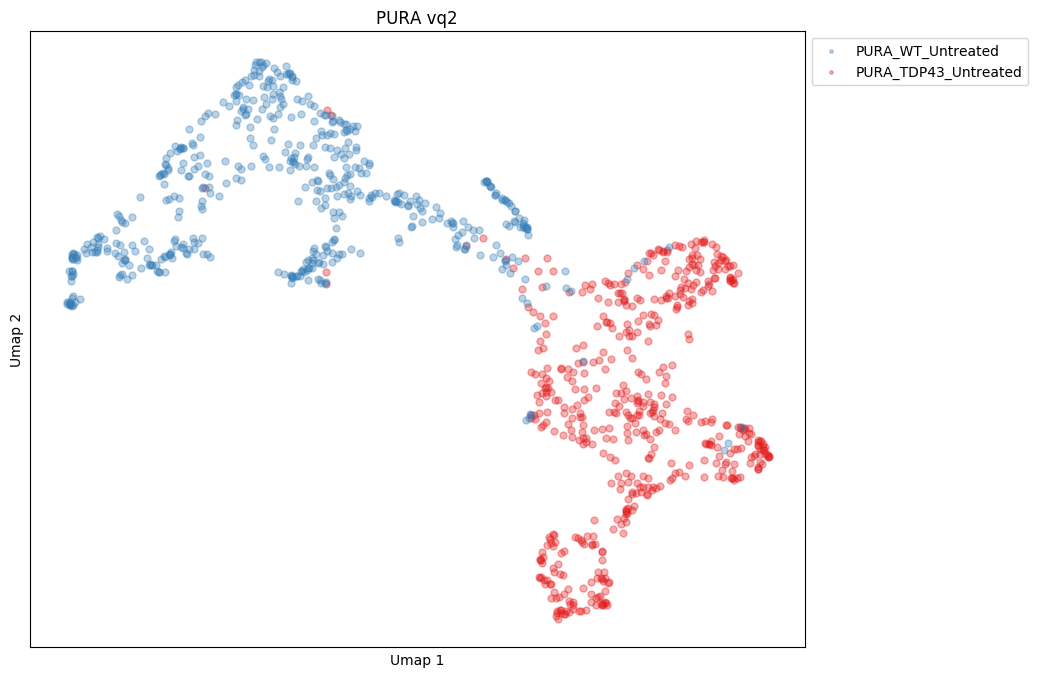

On UMAP vectors


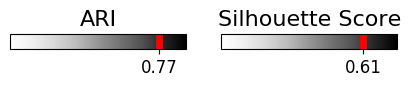

On embedded vectors


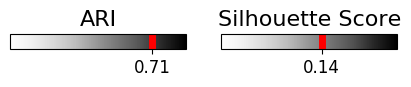

2023-02-26 10:48:37 INFO [pertrubations B SQSTM1] Marker: SQSTM1


X, y:
(1212, 100, 100, 2) (1212,)
SQSTM1_WT_Untreated       684
SQSTM1_TDP43_Untreated    528
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL18_model_weights.0040.h5
is loaded.
Ground truth:
['SQSTM1_TDP43_Untreated' 'SQSTM1_WT_Untreated']
Inferring embedding vectors...
1212/1212 [==============================] - 4s 4ms/sample
Computing UMAP...
UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=1, verbose=True)
Construct fuzzy simplicial set
Sun Feb 26 10:49:04 2023 Finding Nearest Neighbors
Sun Feb 26 10:49:04 2023 Finished Nearest Neighbor Search
Sun Feb 26 10:49:04 2023 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


100%|██████████| 2/2 [00:00<00:00, 309.68it/s]

Sun Feb 26 10:49:07 2023 Finished embedding
Plotting umap_gt subplot1 ...


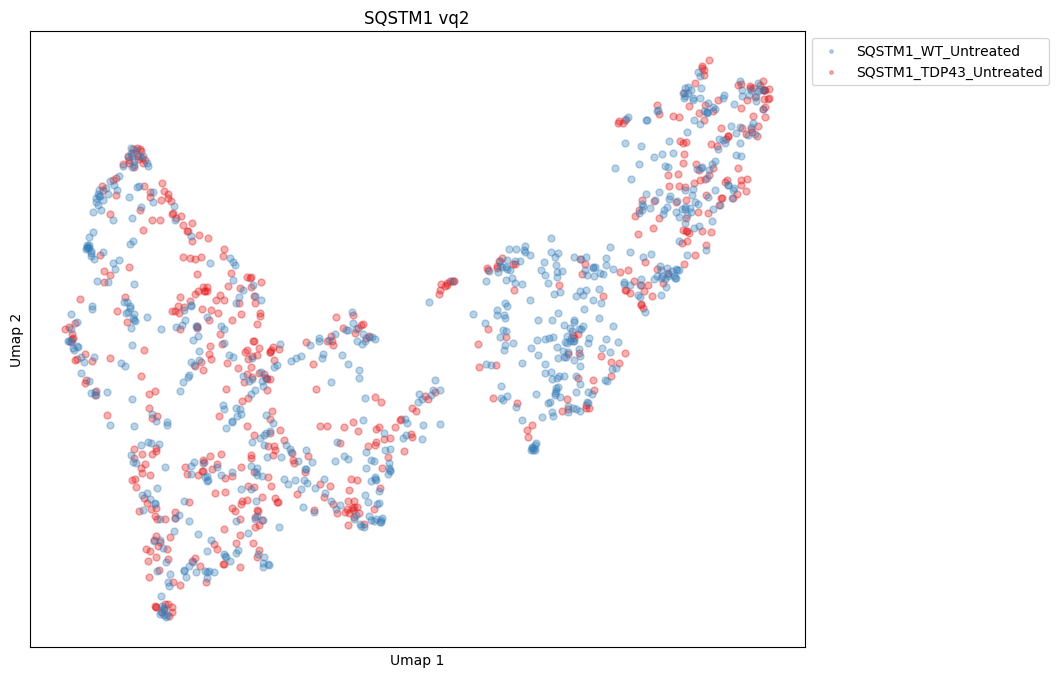

On UMAP vectors


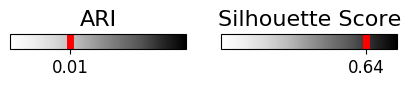

On embedded vectors


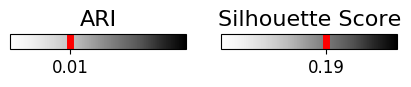

In [4]:
get_figures({"pertrubations":["b"]})

In [5]:
logging.info(f"DONE!")

2023-02-26 10:49:09 INFO DONE!
